In [40]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import numpy as np 
import warnings 
warnings.filterwarnings('ignore')

In [4]:
salaryData = pd.read_csv('Salary_Data.csv')

In [5]:
salaryData.head()
# concluding from problem statement
# 'YearsExperience' is feature
# 'Salary' is target

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
salaryData.info()
# both columns are of numerical dtype
# no null values present
# implies no need to perform imputation 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
salaryData.describe()
# inspectind moments

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
# storing feature data in X
X = salaryData[['YearsExperience']]

In [9]:
# storing target data in Y
Y = salaryData[['Salary']]

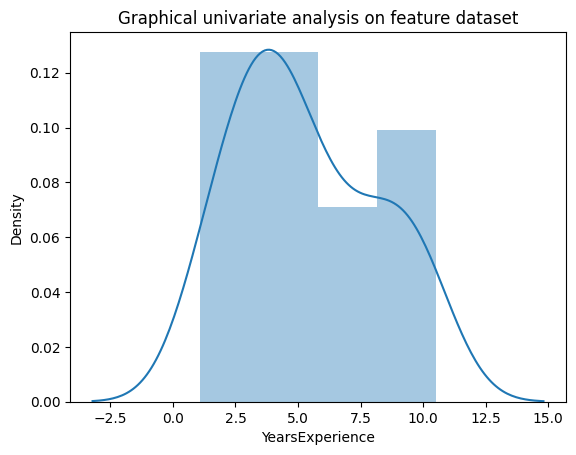

In [10]:
# Graphical univariate analysis on feature dataset
sns.distplot(X,kde=True)
plt.xlabel('YearsExperience')
plt.title('Graphical univariate analysis on feature dataset')
plt.show()
# graphically distribution seems right skewed
# no outliers present 

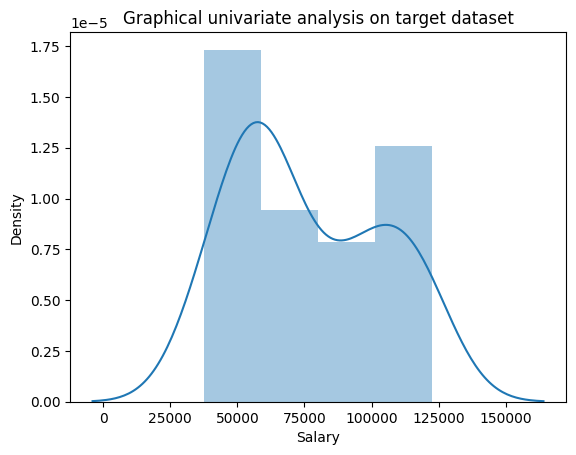

In [11]:
# Graphical univariate analysis on target dataset
sns.distplot(Y,kde=True)
plt.xlabel('Salary')
plt.title('Graphical univariate analysis on target dataset')
plt.show()
# graphically distribution seems right skewed
# no outliers present 

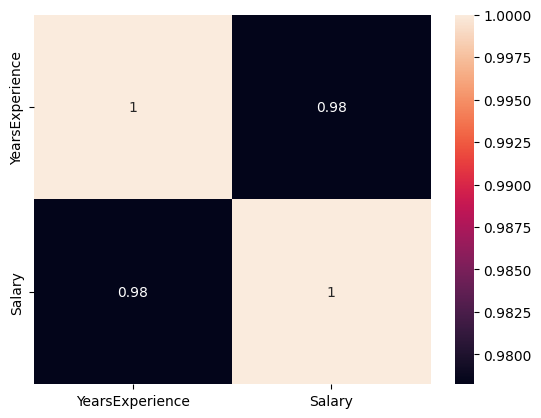

In [12]:
# bivariate analysis 
# checking for correlation between variables
sns.heatmap(salaryData.corr(), annot=True)
plt.show()
# there exists correlation between feature and target

In [13]:
# quantifying skewness of feature dataset 
X.skew()
# since skewness of feature is considerably high 
# need to perform transformation 

YearsExperience    0.37956
dtype: float64

In [14]:
# quantifying skewness of target dataset 
Y.skew()
# since skewness of feature is considerably high 
# need to perform transformation 

Salary    0.35412
dtype: float64

In [15]:
# performing square root transformation on feature dataset 
# to reduce skewness
new_X = X**0.5

In [16]:
new_X.skew()
# skewness after transformation is reduced 

YearsExperience   -0.049196
dtype: float64

In [17]:
# performing log transformation on feature dataset 
# to reduce skewness
new_Y = np.log(Y)

In [18]:
new_Y.skew()
# skewness after transformation is reduced 

Salary   -0.044126
dtype: float64

In [24]:
# new dataframe of dataset after transformation 
newData = pd.DataFrame({'YearsExperience':new_X.values.ravel(),
                        'Salary':new_Y.values.ravel()},
                         index=salaryData.index)

In [27]:
# making simle linear regression model using ols 
# passing new transformed data 
model = smf.ols(formula='Salary~YearsExperience',
               data=newData).fit()

In [29]:
model.summary()
# intercept of best fitted line is 9.9274
# feature coefficient is 0.5620
# t-statistic of feature and intercept are high and p-value is 0
# reject null hypothesis that all the coefficients are 0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     466.4
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           5.37e-19
Time:                        14:56:56   Log-Likelihood:                 30.933
No. Observations:                  30   AIC:                            -57.87
Df Residuals:                      28   BIC:                            -55.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           9.9274      0.060    165.502      0.000       9.805      10.050
YearsExperience     0.5620      0.026     21.596      0.000       0.509       0.615
==============================================================================
Omnibus:                        1.111   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.574   Jarque-Bera (JB):                0.938
Skew:                           0.186   Prob(JB):                        0.626
Kurtosis:                       2.218   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# storing actual target values in var 
actual = new_Y.values.ravel()

In [32]:
# storing prediction values in var 
pred = model.predict(new_X).values

In [36]:
result = pd.DataFrame({'Actual':actual,
                       'predicted':pred})

In [37]:
result.head()

,Actual,predicted
0,10.580073,10.516781
1,10.740843,10.568127
2,10.538237,10.615653
3,10.681091,10.722129
4,10.593906,10.760920


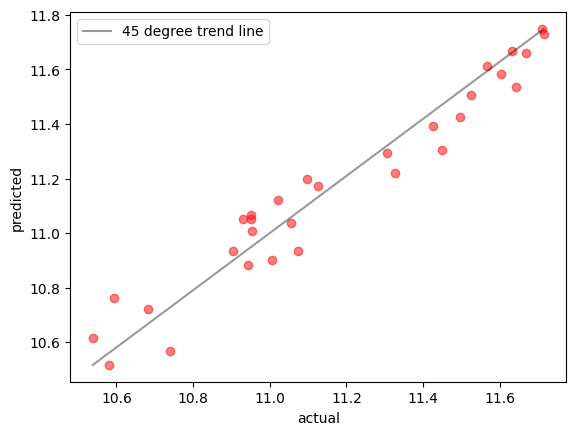

In [38]:
# expecting scatter plot to follow 45 degree trend line 
# if predicted values are same as actual values
plt.scatter(actual,pred,
           color='red',alpha=0.5)
plt.plot([actual.min(),actual.max()],
         [pred.min(),pred.max()],color='black',
         alpha=0.4,label='45 degree trend line')
plt.legend()
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()
# scatter plot seems to follow 45 degree trend line 

In [43]:
score = r2_score(actual,pred)*100

In [44]:
model.params

Intercept          9.927378
YearsExperience    0.561974
dtype: float64

In [45]:
beta = model.params.Intercept
eps = model.params.YearsExperience 

In [48]:
# evaluating model performance using r2score 
print('model training accuracy is : %.2f %%' % score )

model training accuracy is : 94.34 %


In [76]:
# built simple linear regression model 
# with 93.34% accuracy score on 'training dataset'
# 'Y' is 'salary'(target)
# 'X' is 'years_experience'(feature)
Y = np.exp(beta*X**0.5 + eps)